In [1]:
import os
import sys
import time
import random
import pandas as pd
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
from scipy.linalg import svd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from side_info_decoding.utils import (
    set_seed, 
    load_data_from_pids, 
    sliding_window_over_trials
)
from side_info_decoding.reduced_rank import (
    Multi_Task_Reduced_Rank_Model, 
    train_multi_task, 
    model_eval
)

from one.api import ONE

seed = 666
set_seed(seed)

In [2]:
%matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 10
BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=2)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10

In [3]:
regions = [
    "CP", "GPe", "LSr",
    "PO", "DG", #"LP",
    "NI", "PB", "PAG",
    "SCm", "SNr", "IRN",
    "SPIV", "LGv", "LIN", "MDRN",
    "PYR", "COPY", "VAL",
    "ORBvl", "Alv", "FRP",
    "STN", "APr"
]

1/23 regions remaining ...
CP: 85 PIDs
pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: e5bd461c-a713-4b3c-b165-a132a711e59d
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 152 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 489/489 [00:00<00:00, 1275.28it/s]


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 52 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 460/460 [00:00<00:00, 4048.20it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 71 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 556/556 [00:00<00:00, 3509.09it/s]


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 52 Kilosort units in region cp


Compute spike count: 100%|███████████████████| 501/501 [00:01<00:00, 257.72it/s]


pulling data from ibl database ..
eid: 4546cd60-fa2a-4d20-a9b6-d091e01d16f2
pid: a464fc97-1391-4bbe-9aef-73a79975d27f
number of trials found: 488
found 488 trials from 55.38 to 2730.49 sec.
found 37 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 488/488 [00:00<00:00, 1961.59it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 310c60b6-d68f-4018-a86a-3668ce296837
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 166 Kilosort units in region cp


Compute spike count: 100%|███████████████████| 775/775 [00:01<00:00, 468.70it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 06cb2ee3-0fb8-4ace-acbe-19c716f3ca40
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 133 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 775/775 [00:00<00:00, 2461.23it/s]


pulling data from ibl database ..
eid: 8a1cf4ef-06e3-4c72-9bc7-e1baa189841b
pid: 5e8ac11b-959a-49ab-a6a3-8a3397e1df0e
number of trials found: 352
found 352 trials from 12.95 to 2826.29 sec.
found 205 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 352/352 [00:00<00:00, 1448.63it/s]


pulling data from ibl database ..
eid: 27ef44c0-acb2-4220-b776-477d0d5abd35
pid: d23dec01-b35e-4950-9afa-72a1b3e74148
number of trials found: 515
found 515 trials from 130.73 to 3420.40 sec.
found 112 Kilosort units in region cp


Compute spike count: 100%|███████████████████| 515/515 [00:00<00:00, 619.98it/s]


pulling data from ibl database ..
eid: 63c70ae8-4dfb-418b-b21b-f0b1e5fba6c9
pid: 83716e49-3026-41a3-b021-1a4b6362f433
number of trials found: 786
found 786 trials from 164.72 to 4027.97 sec.
found 12 Kilosort units in region cp


Compute spike count: 100%|██████████████████| 786/786 [00:00<00:00, 1871.51it/s]


pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: e5bd461c-a713-4b3c-b165-a132a711e59d
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 9 good units in region cp


Compute spike count: 100%|██████████████████| 489/489 [00:00<00:00, 8451.48it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 2 good units in region cp


Compute spike count: 100%|██████████████████| 460/460 [00:00<00:00, 9094.50it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 4 good units in region cp


Compute spike count: 100%|█████████████████| 556/556 [00:00<00:00, 16171.99it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 1 good units in region cp


Compute spike count: 100%|█████████████████| 501/501 [00:00<00:00, 21649.53it/s]


pulling data from ibl database ..
eid: 4546cd60-fa2a-4d20-a9b6-d091e01d16f2
pid: a464fc97-1391-4bbe-9aef-73a79975d27f
number of trials found: 488
found 488 trials from 55.38 to 2730.49 sec.
found 5 good units in region cp


Compute spike count: 100%|█████████████████| 488/488 [00:00<00:00, 14198.65it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 310c60b6-d68f-4018-a86a-3668ce296837
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 58 good units in region cp


Compute spike count: 100%|██████████████████| 775/775 [00:00<00:00, 1464.70it/s]


pulling data from ibl database ..
eid: ae8787b1-4229-4d56-b0c2-566b61a25b77
pid: 06cb2ee3-0fb8-4ace-acbe-19c716f3ca40
number of trials found: 775
found 775 trials from 117.56 to 4153.90 sec.
found 25 good units in region cp


Compute spike count: 100%|██████████████████| 775/775 [00:00<00:00, 5646.26it/s]


pulling data from ibl database ..
eid: 8a1cf4ef-06e3-4c72-9bc7-e1baa189841b
pid: 5e8ac11b-959a-49ab-a6a3-8a3397e1df0e
number of trials found: 352
found 352 trials from 12.95 to 2826.29 sec.
found 40 good units in region cp


Compute spike count: 100%|██████████████████| 352/352 [00:00<00:00, 4188.41it/s]


pulling data from ibl database ..
eid: 27ef44c0-acb2-4220-b776-477d0d5abd35
pid: d23dec01-b35e-4950-9afa-72a1b3e74148
number of trials found: 515
found 515 trials from 130.73 to 3420.40 sec.
found 15 good units in region cp


Compute spike count: 100%|██████████████████| 515/515 [00:00<00:00, 3268.68it/s]


pulling data from ibl database ..
eid: 63c70ae8-4dfb-418b-b21b-f0b1e5fba6c9
pid: 83716e49-3026-41a3-b021-1a4b6362f433
number of trials found: 786
found 786 trials from 164.72 to 4027.97 sec.
found 0 good units in region cp


Compute spike count: 100%|█████████████████| 786/786 [00:00<00:00, 91810.26it/s]

Start extracting V from trials with different contrasts ...


Epoch [500/5000], Loss: 11.755214392745193
Epoch [1000/5000], Loss: 3.488315598791984
Epoch [1500/5000], Loss: 1.3278031811640105
Epoch [2000/5000], Loss: 0.751924884017202
Epoch [2500/5000], Loss: 0.5983743739288678
Epoch [3000/5000], Loss: 0.5074104828582525
Epoch [3500/5000], Loss: 0.4543722518876695
Epoch [4000/5000], Loss: 0.43564573864366174
Epoch [4500/5000], Loss: 0.42913552316096587
Epoch [5000/5000], Loss: 0.42683481060594064


/tmp/ipykernel_61642/3256490999.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


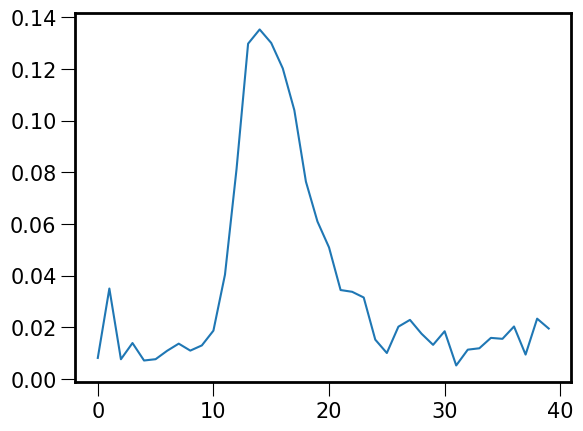

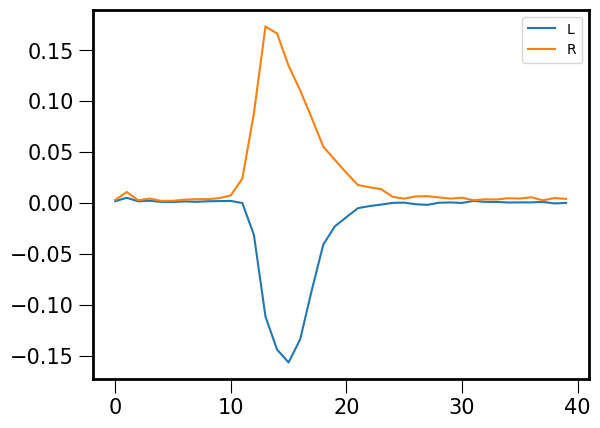

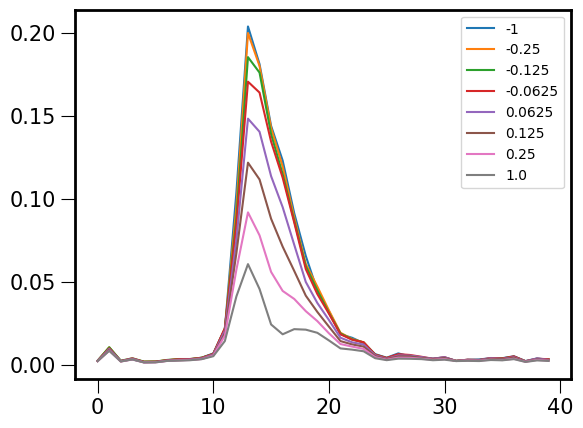

time spent:  149.250 seconds
2/23 regions remaining ...
GPe: 13 PIDs
pulling data from ibl database ..
eid: c23b4118-db40-4333-af1d-933154b533c6
pid: 32e30a72-5f18-4aff-81c3-4553531b2d75
number of trials found: 398
found 398 trials from 53.60 to 2728.11 sec.
found 6 Kilosort units in region gpe


Compute spike count: 100%|██████████████████| 398/398 [00:00<00:00, 7469.72it/s]


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 35 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 460/460 [00:00<00:00, 798.48it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 57 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 556/556 [00:02<00:00, 232.63it/s]


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 171 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 501/501 [00:03<00:00, 130.00it/s]


pulling data from ibl database ..
eid: e9fc0a2d-c69d-44d1-9fa3-314782387cae
pid: 06d42449-d6ac-4c35-8f85-24ecfbc08bc1
number of trials found: 373
found 373 trials from 29.16 to 3462.97 sec.
found 173 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 373/373 [00:02<00:00, 134.44it/s]


pulling data from ibl database ..
eid: 0cc486c3-8c7b-494d-aa04-b70e2690bcba
pid: d8ccc6bb-f0d9-494a-b682-f12c73e228c6
number of trials found: 499
found 499 trials from 117.82 to 2843.18 sec.
found 61 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 499/499 [00:03<00:00, 155.47it/s]


pulling data from ibl database ..
eid: 35ed605c-1a1a-47b1-86ff-2b56144f55af
pid: 117f0d28-3cc0-4837-9e3e-46db5bc3e662
number of trials found: 463
found 463 trials from 16.81 to 2359.51 sec.
found 64 Kilosort units in region gpe


Compute spike count: 100%|███████████████████| 463/463 [00:02<00:00, 161.84it/s]


pulling data from ibl database ..
eid: 0b7ee1b6-42db-46cd-a465-08f531366187
pid: b8dbd3af-a589-41e4-878c-3372eaa1a8f6
number of trials found: 704
found 704 trials from 43.73 to 3753.06 sec.
found 95 Kilosort units in region gpe


Compute spike count: 100%|████████████████████| 704/704 [00:07<00:00, 94.61it/s]


pulling data from ibl database ..
eid: 768a371d-7e88-47f8-bf21-4a6a6570dd6e
pid: 39180bcb-13e5-46f9-89e1-8ea2cba22105
number of trials found: 349
found 349 trials from 80.79 to 2743.95 sec.
found 35 Kilosort units in region gpe


Compute spike count: 100%|██████████████████| 349/349 [00:00<00:00, 3298.91it/s]


pulling data from ibl database ..
eid: 28741f91-c837-4147-939e-918d38d849f2
pid: bf591043-03c2-48bb-9197-e17e85aaeb8f
number of trials found: 340
found 340 trials from 28.05 to 2993.06 sec.
found 49 Kilosort units in region gpe


Compute spike count: 100%|██████████████████| 340/340 [00:00<00:00, 1653.28it/s]


pulling data from ibl database ..
eid: c23b4118-db40-4333-af1d-933154b533c6
pid: 32e30a72-5f18-4aff-81c3-4553531b2d75
number of trials found: 398
found 398 trials from 53.60 to 2728.11 sec.
found 0 good units in region gpe


Compute spike count: 100%|█████████████████| 398/398 [00:00<00:00, 91071.09it/s]


pulling data from ibl database ..
eid: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5
pid: 9866c08f-acce-4291-b94d-d9835e62f835
number of trials found: 460
found 460 trials from 120.34 to 3175.35 sec.
found 0 good units in region gpe


Compute spike count: 100%|█████████████████| 460/460 [00:00<00:00, 85219.96it/s]


pulling data from ibl database ..
eid: fbd28ea6-3251-48e0-b215-2c51ec5185f7
pid: fd6d686b-eae1-44cb-adbb-159c69c85827
number of trials found: 556
found 556 trials from 182.88 to 3186.58 sec.
found 2 good units in region gpe


Compute spike count: 100%|██████████████████| 556/556 [00:00<00:00, 3233.24it/s]


pulling data from ibl database ..
eid: ef38e503-dd79-4185-bf87-4712d4f274fe
pid: 379105fd-dbb1-40d9-8a51-ae5a8ef8df04
number of trials found: 501
found 501 trials from 101.30 to 3424.04 sec.
found 10 good units in region gpe


Compute spike count: 100%|██████████████████| 501/501 [00:00<00:00, 1679.72it/s]


pulling data from ibl database ..
eid: e9fc0a2d-c69d-44d1-9fa3-314782387cae
pid: 06d42449-d6ac-4c35-8f85-24ecfbc08bc1
number of trials found: 373
found 373 trials from 29.16 to 3462.97 sec.
found 17 good units in region gpe


Compute spike count: 100%|███████████████████| 373/373 [00:00<00:00, 753.21it/s]


pulling data from ibl database ..
eid: 0cc486c3-8c7b-494d-aa04-b70e2690bcba
pid: d8ccc6bb-f0d9-494a-b682-f12c73e228c6
number of trials found: 499
found 499 trials from 117.82 to 2843.18 sec.
found 24 good units in region gpe


Compute spike count: 100%|███████████████████| 499/499 [00:01<00:00, 270.96it/s]


pulling data from ibl database ..
eid: 35ed605c-1a1a-47b1-86ff-2b56144f55af
pid: 117f0d28-3cc0-4837-9e3e-46db5bc3e662
number of trials found: 463
found 463 trials from 16.81 to 2359.51 sec.
found 19 good units in region gpe


Compute spike count: 100%|███████████████████| 463/463 [00:01<00:00, 322.48it/s]


pulling data from ibl database ..
eid: 0b7ee1b6-42db-46cd-a465-08f531366187
pid: b8dbd3af-a589-41e4-878c-3372eaa1a8f6
number of trials found: 704
found 704 trials from 43.73 to 3753.06 sec.
found 16 good units in region gpe


Compute spike count: 100%|███████████████████| 704/704 [00:01<00:00, 357.62it/s]


pulling data from ibl database ..
eid: 768a371d-7e88-47f8-bf21-4a6a6570dd6e
pid: 39180bcb-13e5-46f9-89e1-8ea2cba22105
number of trials found: 349
found 349 trials from 80.79 to 2743.95 sec.
found 7 good units in region gpe


Compute spike count: 100%|██████████████████| 349/349 [00:00<00:00, 5585.68it/s]


pulling data from ibl database ..
eid: 28741f91-c837-4147-939e-918d38d849f2
pid: bf591043-03c2-48bb-9197-e17e85aaeb8f
number of trials found: 340
found 340 trials from 28.05 to 2993.06 sec.
found 7 good units in region gpe


Compute spike count: 100%|██████████████████| 340/340 [00:00<00:00, 6530.34it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 13.233688614099306
Epoch [1000/5000], Loss: 4.447072666913642
Epoch [1500/5000], Loss: 1.483805974001846
Epoch [2000/5000], Loss: 0.7439275905210556
Epoch [2500/5000], Loss: 0.525022024530307
Epoch [3000/5000], Loss: 0.4289988965283062
Epoch [3500/5000], Loss: 0.3908422923516269
Epoch [4000/5000], Loss: 0.38056314771583544
Epoch [4500/5000], Loss: 0.3785597248459314
Epoch [5000/5000], Loss: 0.3781837475212095


/tmp/ipykernel_61642/3256490999.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


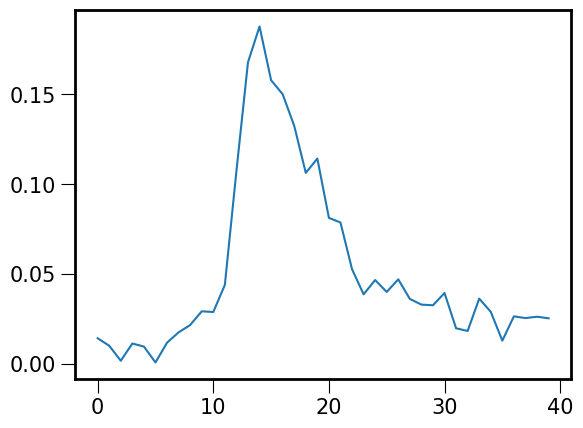

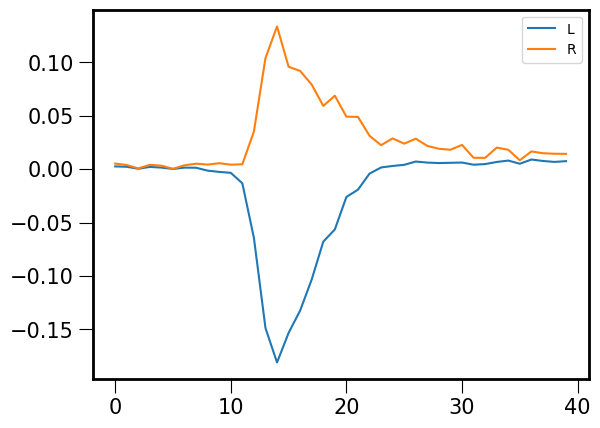

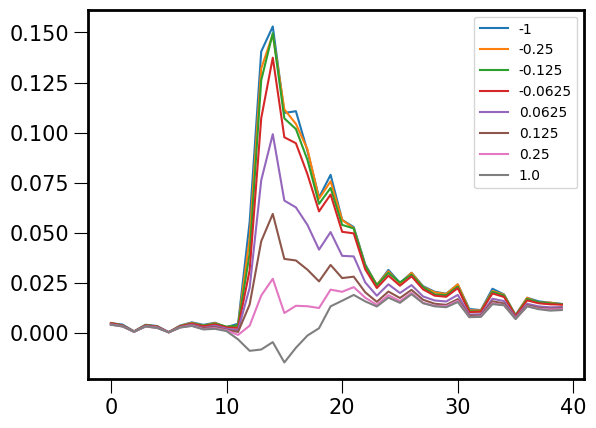

time spent:  105.630 seconds
3/23 regions remaining ...
LSr: 32 PIDs
pulling data from ibl database ..
eid: cef05f87-161b-4031-932c-6f47daf89698
pid: c1014051-d06b-4f85-9887-e7c42a94baf2
number of trials found: 507
found 507 trials from 65.75 to 2758.36 sec.
found 49 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 507/507 [00:00<00:00, 1773.87it/s]


pulling data from ibl database ..
eid: 0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde
pid: 1ab86a7f-578b-4a46-9c9c-df3be97abcca
number of trials found: 1039
found 1039 trials from 38.64 to 5418.96 sec.
found 156 Kilosort units in region lsr


Compute spike count: 100%|█████████████████| 1039/1039 [00:04<00:00, 255.27it/s]


pulling data from ibl database ..
eid: 196a2adf-ff83-49b2-823a-33f990049c2e
pid: e92f8734-2c06-4168-9271-d00b3bf57c02
number of trials found: 526
found 526 trials from 126.81 to 2708.15 sec.
found 27 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 526/526 [00:00<00:00, 3394.78it/s]


pulling data from ibl database ..
eid: 19b44992-d527-4a12-8bda-aa11379cb08c
pid: c872ca65-8319-4901-856e-7dc507e2dd9c
number of trials found: 354
found 354 trials from 19.95 to 4672.96 sec.
found 4 Kilosort units in region lsr


Compute spike count: 100%|█████████████████| 354/354 [00:00<00:00, 43779.56it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: ebc9392c-1ecb-4b4b-a545-4e3d70d23611
pid: 6358854e-51d2-47de-a278-5cbfd155feb6
number of trials found: 412
found 412 trials from 24.32 to 4249.14 sec.
found 314 Kilosort units in region lsr


Compute spike count: 100%|███████████████████| 412/412 [00:01<00:00, 382.77it/s]


pulling data from ibl database ..
eid: a4a74102-2af5-45dc-9e41-ef7f5aed88be
pid: a5f2ec22-0ff3-4249-bd2f-6247c3990e53
number of trials found: 369
found 369 trials from 69.71 to 1863.38 sec.
found 144 Kilosort units in region lsr


Compute spike count: 100%|███████████████████| 369/369 [00:00<00:00, 917.07it/s]


pulling data from ibl database ..
eid: 6f6d2c8e-28be-49f4-ae4d-06be2d3148c1
pid: adcd791c-ead3-4572-a9cb-028bbee1d2e4
number of trials found: 486
found 486 trials from 39.95 to 2854.62 sec.
found 36 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 486/486 [00:00<00:00, 2250.59it/s]


pulling data from ibl database ..
eid: 113c5b6c-940e-4b21-b462-789b4c2be0e5
pid: af2a0072-e17e-4368-b80b-1359bf6d4647
number of trials found: 385
found 385 trials from 80.81 to 2695.28 sec.
found 76 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 385/385 [00:00<00:00, 1991.44it/s]


pulling data from ibl database ..
eid: 2c44a360-5a56-4971-8009-f469fb59de98
pid: 688606f8-9733-46f2-8331-b2dd84c5d385
number of trials found: 534
found 534 trials from 48.24 to 2813.73 sec.
found 98 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 534/534 [00:00<00:00, 1573.43it/s]


pulling data from ibl database ..
eid: d7e60cc3-6020-429e-a654-636c6cc677ea
pid: 6efc58a4-e1cd-4eca-9205-7e4898cc1f8b
number of trials found: 422
found 422 trials from 114.75 to 3915.00 sec.
found 151 Kilosort units in region lsr


Compute spike count: 100%|██████████████████| 422/422 [00:00<00:00, 1297.27it/s]


pulling data from ibl database ..
eid: cef05f87-161b-4031-932c-6f47daf89698
pid: c1014051-d06b-4f85-9887-e7c42a94baf2
number of trials found: 507
found 507 trials from 65.75 to 2758.36 sec.
found 2 good units in region lsr


Compute spike count: 100%|█████████████████| 507/507 [00:00<00:00, 20486.04it/s]


pulling data from ibl database ..
eid: 0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde
pid: 1ab86a7f-578b-4a46-9c9c-df3be97abcca
number of trials found: 1039
found 1039 trials from 38.64 to 5418.96 sec.
found 10 good units in region lsr


Compute spike count: 100%|████████████████| 1039/1039 [00:00<00:00, 2009.30it/s]


pulling data from ibl database ..
eid: 196a2adf-ff83-49b2-823a-33f990049c2e
pid: e92f8734-2c06-4168-9271-d00b3bf57c02
number of trials found: 526
found 526 trials from 126.81 to 2708.15 sec.
found 8 good units in region lsr


Compute spike count: 100%|██████████████████| 526/526 [00:00<00:00, 8071.84it/s]


pulling data from ibl database ..
eid: 19b44992-d527-4a12-8bda-aa11379cb08c
pid: c872ca65-8319-4901-856e-7dc507e2dd9c
number of trials found: 354
found 354 trials from 19.95 to 4672.96 sec.
found 0 good units in region lsr


Compute spike count: 100%|█████████████████| 354/354 [00:00<00:00, 87386.48it/s]


pulling data from ibl database ..
eid: ebc9392c-1ecb-4b4b-a545-4e3d70d23611
pid: 6358854e-51d2-47de-a278-5cbfd155feb6
number of trials found: 412
found 412 trials from 24.32 to 4249.14 sec.
found 71 good units in region lsr


Compute spike count: 100%|██████████████████| 412/412 [00:00<00:00, 1307.70it/s]


pulling data from ibl database ..
eid: a4a74102-2af5-45dc-9e41-ef7f5aed88be
pid: a5f2ec22-0ff3-4249-bd2f-6247c3990e53
number of trials found: 369
found 369 trials from 69.71 to 1863.38 sec.
found 22 good units in region lsr


Compute spike count: 100%|██████████████████| 369/369 [00:00<00:00, 3381.85it/s]


pulling data from ibl database ..
eid: 6f6d2c8e-28be-49f4-ae4d-06be2d3148c1
pid: adcd791c-ead3-4572-a9cb-028bbee1d2e4
number of trials found: 486
found 486 trials from 39.95 to 2854.62 sec.
found 10 good units in region lsr


Compute spike count: 100%|██████████████████| 486/486 [00:00<00:00, 3067.84it/s]


pulling data from ibl database ..
eid: 113c5b6c-940e-4b21-b462-789b4c2be0e5
pid: af2a0072-e17e-4368-b80b-1359bf6d4647
number of trials found: 385
found 385 trials from 80.81 to 2695.28 sec.
found 16 good units in region lsr


Compute spike count: 100%|██████████████████| 385/385 [00:00<00:00, 7775.35it/s]


pulling data from ibl database ..
eid: 2c44a360-5a56-4971-8009-f469fb59de98
pid: 688606f8-9733-46f2-8331-b2dd84c5d385
number of trials found: 534
found 534 trials from 48.24 to 2813.73 sec.
found 14 good units in region lsr


Compute spike count: 100%|██████████████████| 534/534 [00:00<00:00, 5453.05it/s]


pulling data from ibl database ..
eid: d7e60cc3-6020-429e-a654-636c6cc677ea
pid: 6efc58a4-e1cd-4eca-9205-7e4898cc1f8b
number of trials found: 422
found 422 trials from 114.75 to 3915.00 sec.
found 22 good units in region lsr


Compute spike count: 100%|██████████████████| 422/422 [00:00<00:00, 6418.68it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 16.475699399075214
Epoch [1000/5000], Loss: 4.598548430315937
Epoch [1500/5000], Loss: 1.3561380608382154
Epoch [2000/5000], Loss: 0.7643382364502892
Epoch [2500/5000], Loss: 0.6607526469398022
Epoch [3000/5000], Loss: 0.6268184206144959
Epoch [3500/5000], Loss: 0.5932588735588744
Epoch [4000/5000], Loss: 0.5666769128855209
Epoch [4500/5000], Loss: 0.5551704511675675
Epoch [5000/5000], Loss: 0.5516564299484774


/tmp/ipykernel_61642/3256490999.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


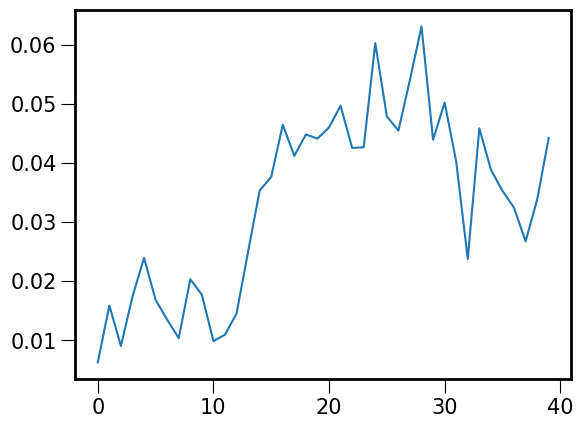

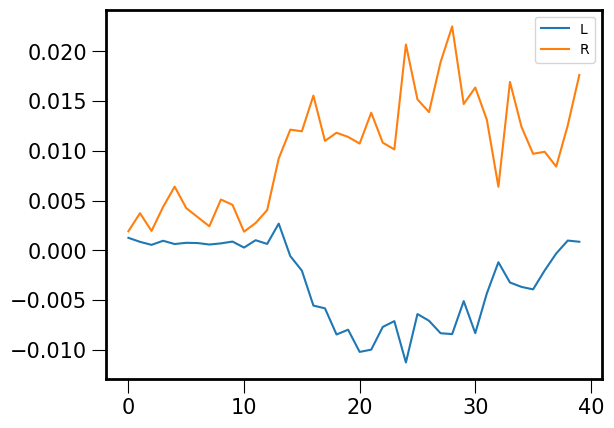

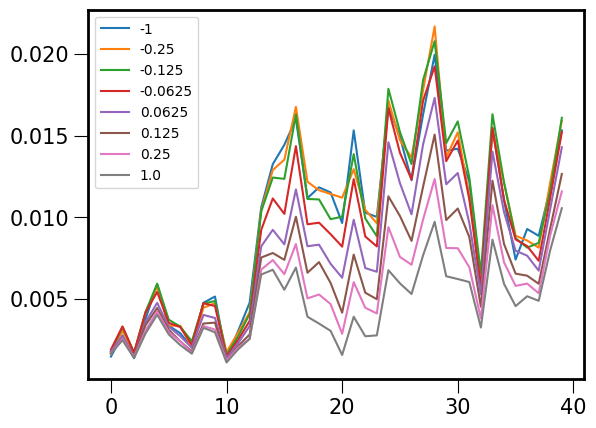

time spent:  144.650 seconds
4/23 regions remaining ...
PO: 68 PIDs
pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 511 Kilosort units in region po


Compute spike count: 100%|████████████████████| 470/470 [00:10<00:00, 43.39it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 131 Kilosort units in region po


Compute spike count: 100%|███████████████████| 715/715 [00:03<00:00, 191.78it/s]


pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: bef05a5c-68c3-4513-87c7-b3151c88da8e
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 10 Kilosort units in region po


Compute spike count: 100%|█████████████████| 489/489 [00:00<00:00, 18050.73it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 37ac03f1-9831-4a30-90fc-a59e635b98bd
pid: 8b31b4bd-003e-4816-a3bf-2df4cc3558f8
number of trials found: 432
found 432 trials from 65.86 to 2896.15 sec.
found 103 Kilosort units in region po


Compute spike count: 100%|██████████████████| 432/432 [00:00<00:00, 1493.89it/s]


pulling data from ibl database ..
eid: be164a14-6e73-42c3-ab60-d29c48693c0f
pid: 77121d92-6dde-4243-ab54-0a99efa22e99
number of trials found: 376
found 376 trials from 79.72 to 2748.78 sec.
found 225 Kilosort units in region po


Compute spike count: 100%|███████████████████| 376/376 [00:00<00:00, 398.30it/s]


pulling data from ibl database ..
eid: 3bb54985-77b2-421d-9d1f-46185be51216
pid: 81950362-ed95-4662-997f-e119bbd594d1
number of trials found: 648
found 648 trials from 49.35 to 3147.13 sec.
found 10 Kilosort units in region po


Compute spike count: 100%|██████████████████| 648/648 [00:00<00:00, 2439.42it/s]


pulling data from ibl database ..
eid: 87ad026d-5b95-4022-8d59-c260870d830f
pid: 4f922a5b-5014-455d-8cd5-7caed78af615
number of trials found: 812
found 812 trials from 65.33 to 3887.55 sec.
found 32 Kilosort units in region po


Compute spike count: 100%|██████████████████| 812/812 [00:00<00:00, 4198.68it/s]


pulling data from ibl database ..
eid: 2038e95d-64d4-4ecb-83d0-1308d3c598f8
pid: 1a924329-65aa-465d-b201-c2dd898aebd0
number of trials found: 481
found 481 trials from 61.03 to 2940.03 sec.
found 70 Kilosort units in region po


Compute spike count: 100%|███████████████████| 481/481 [00:00<00:00, 939.39it/s]


pulling data from ibl database ..
eid: a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e
pid: 5135e93f-2f1f-4301-9532-b5ad62548c49
number of trials found: 364
found 364 trials from 76.32 to 3810.93 sec.
found 157 Kilosort units in region po


Compute spike count: 100%|██████████████████| 364/364 [00:00<00:00, 1244.19it/s]


pulling data from ibl database ..
eid: 8928f98a-b411-497e-aa4b-aa752434686d
pid: ad714133-1e03-4d3a-8427-33fc483daf1a
number of trials found: 583
found 583 trials from 112.34 to 3275.94 sec.
found 294 Kilosort units in region po


Compute spike count: 100%|███████████████████| 583/583 [00:03<00:00, 147.27it/s]


pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 39 good units in region po


Compute spike count: 100%|██████████████████| 470/470 [00:00<00:00, 1088.39it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 5 good units in region po


Compute spike count: 100%|██████████████████| 715/715 [00:00<00:00, 3181.03it/s]


pulling data from ibl database ..
eid: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad
pid: bef05a5c-68c3-4513-87c7-b3151c88da8e
number of trials found: 489
found 489 trials from 101.15 to 3448.76 sec.
found 0 good units in region po


Compute spike count: 100%|█████████████████| 489/489 [00:00<00:00, 83161.60it/s]


pulling data from ibl database ..
eid: 37ac03f1-9831-4a30-90fc-a59e635b98bd
pid: 8b31b4bd-003e-4816-a3bf-2df4cc3558f8
number of trials found: 432
found 432 trials from 65.86 to 2896.15 sec.
found 1 good units in region po


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 28374.51it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: be164a14-6e73-42c3-ab60-d29c48693c0f
pid: 77121d92-6dde-4243-ab54-0a99efa22e99
number of trials found: 376
found 376 trials from 79.72 to 2748.78 sec.
found 10 good units in region po


Compute spike count: 100%|█████████████████| 376/376 [00:00<00:00, 13087.84it/s]


pulling data from ibl database ..
eid: 3bb54985-77b2-421d-9d1f-46185be51216
pid: 81950362-ed95-4662-997f-e119bbd594d1
number of trials found: 648
found 648 trials from 49.35 to 3147.13 sec.
found 0 good units in region po


Compute spike count: 100%|█████████████████| 648/648 [00:00<00:00, 89922.55it/s]


pulling data from ibl database ..
eid: 87ad026d-5b95-4022-8d59-c260870d830f
pid: 4f922a5b-5014-455d-8cd5-7caed78af615
number of trials found: 812
found 812 trials from 65.33 to 3887.55 sec.
found 0 good units in region po


Compute spike count: 100%|█████████████████| 812/812 [00:00<00:00, 86440.99it/s]


pulling data from ibl database ..
eid: 2038e95d-64d4-4ecb-83d0-1308d3c598f8
pid: 1a924329-65aa-465d-b201-c2dd898aebd0
number of trials found: 481
found 481 trials from 61.03 to 2940.03 sec.
found 2 good units in region po


Compute spike count: 100%|█████████████████| 481/481 [00:00<00:00, 28733.02it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e
pid: 5135e93f-2f1f-4301-9532-b5ad62548c49
number of trials found: 364
found 364 trials from 76.32 to 3810.93 sec.
found 8 good units in region po


Compute spike count: 100%|█████████████████| 364/364 [00:00<00:00, 13428.50it/s]


pulling data from ibl database ..
eid: 8928f98a-b411-497e-aa4b-aa752434686d
pid: ad714133-1e03-4d3a-8427-33fc483daf1a
number of trials found: 583
found 583 trials from 112.34 to 3275.94 sec.
found 60 good units in region po


Compute spike count: 100%|███████████████████| 583/583 [00:00<00:00, 751.64it/s]


Start extracting V from trials with different contrasts ...
Epoch [500/5000], Loss: 14.69063777360525
Epoch [1000/5000], Loss: 5.1698284787220325
Epoch [1500/5000], Loss: 1.692347404645036
Epoch [2000/5000], Loss: 0.8381246421609465
Epoch [2500/5000], Loss: 0.6434007877824942
Epoch [3000/5000], Loss: 0.5878473582774746
Epoch [3500/5000], Loss: 0.544385143820547
Epoch [4000/5000], Loss: 0.503419248287368
Epoch [4500/5000], Loss: 0.48783291370060156
Epoch [5000/5000], Loss: 0.4838481670308868


/tmp/ipykernel_61642/3256490999.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])


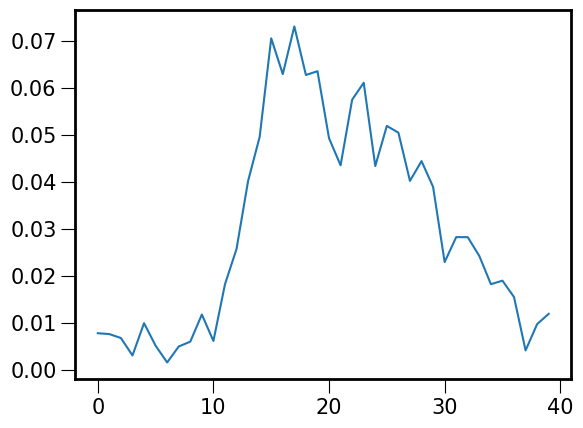

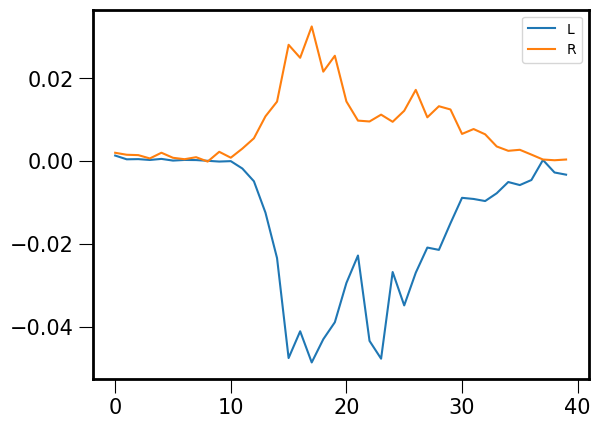

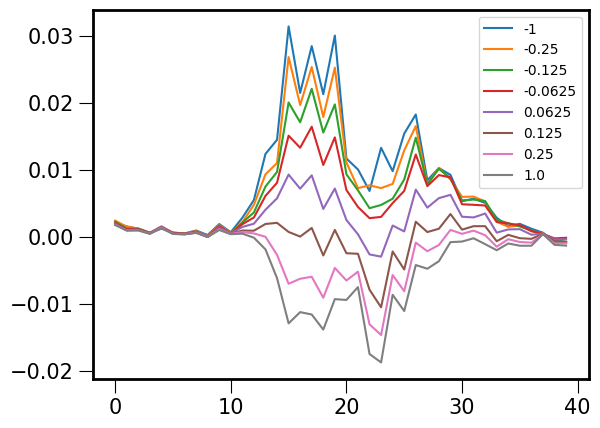

time spent:  188.119 seconds
5/23 regions remaining ...
DG: 205 PIDs
pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 39 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 470/470 [00:00<00:00, 5834.99it/s]


pulling data from ibl database ..
eid: 5ae68c54-2897-4d3a-8120-426150704385
pid: a8a59fc3-a658-4db4-b5e8-09f1e4df03fd
number of trials found: 631
found 631 trials from 17.05 to 4524.18 sec.
found 63 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 631/631 [00:00<00:00, 2421.30it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 139 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 715/715 [00:00<00:00, 1079.27it/s]


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 2 Kilosort units in region dg


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 35819.11it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: d0046384-16ea-4f69-bae9-165e8d0aeacf
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 113 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 358/358 [00:00<00:00, 2667.62it/s]


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: 4836a465-c691-4852-a0b1-dcd2b1ce38a1
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 53 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 358/358 [00:00<00:00, 9358.73it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: b72b22c2-6e9d-4604-9910-20c0e1a467d7
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 245 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 432/432 [00:00<00:00, 1499.77it/s]


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: 49c2ea3d-2b50-4e8a-b124-9e190960784e
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 232 Kilosort units in region dg


Compute spike count: 100%|███████████████████| 432/432 [00:01<00:00, 227.07it/s]


pulling data from ibl database ..
eid: 0cf6d255-8f2f-463e-84fb-c54bacb79f51
pid: c5b9e063-f640-4936-b851-f7602cb6659b
number of trials found: 614
found 614 trials from 52.49 to 2731.05 sec.
found 178 Kilosort units in region dg


Compute spike count: 100%|███████████████████| 614/614 [00:00<00:00, 633.04it/s]


pulling data from ibl database ..
eid: 7eeb8423-49e6-4d40-ab6f-703d17af231a
pid: 88e148d2-d554-42c2-9c41-cc6369f98c45
number of trials found: 553
found 553 trials from 54.37 to 2955.39 sec.
found 28 Kilosort units in region dg


Compute spike count: 100%|██████████████████| 553/553 [00:00<00:00, 5102.46it/s]


pulling data from ibl database ..
eid: ebce500b-c530-47de-8cb1-963c552703ea
pid: 8c732bf2-639d-496c-bf82-464bc9c2d54b
number of trials found: 470
found 470 trials from 13.74 to 5761.52 sec.
found 5 good units in region dg


Compute spike count: 100%|█████████████████| 470/470 [00:00<00:00, 21799.19it/s]


pulling data from ibl database ..
eid: 5ae68c54-2897-4d3a-8120-426150704385
pid: a8a59fc3-a658-4db4-b5e8-09f1e4df03fd
number of trials found: 631
found 631 trials from 17.05 to 4524.18 sec.
found 4 good units in region dg


Compute spike count: 100%|█████████████████| 631/631 [00:00<00:00, 18415.78it/s]


pulling data from ibl database ..
eid: 15b69921-d471-4ded-8814-2adad954bcd8
pid: 7a620688-66cb-44d3-b79b-ccac1c8ba23e
number of trials found: 715
found 715 trials from 28.03 to 3547.82 sec.
found 9 good units in region dg


Compute spike count: 100%|██████████████████| 715/715 [00:00<00:00, 9687.02it/s]


pulling data from ibl database ..
eid: ca4ecb4c-4b60-4723-9b9e-2c54a6290a53
pid: 92822789-608f-44a6-ad64-fe549402b2df
number of trials found: 537
found 537 trials from 18.37 to 3566.46 sec.
found 0 good units in region dg


Compute spike count: 100%|█████████████████| 537/537 [00:00<00:00, 88040.54it/s]


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: d0046384-16ea-4f69-bae9-165e8d0aeacf
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 6 good units in region dg


Compute spike count: 100%|█████████████████| 358/358 [00:00<00:00, 19678.41it/s]


pulling data from ibl database ..
eid: caa5dddc-9290-4e27-9f5e-575ba3598614
pid: 4836a465-c691-4852-a0b1-dcd2b1ce38a1
number of trials found: 358
found 358 trials from 108.84 to 2048.28 sec.
found 6 good units in region dg


Compute spike count: 100%|█████████████████| 358/358 [00:00<00:00, 25498.59it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: b72b22c2-6e9d-4604-9910-20c0e1a467d7
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 7 good units in region dg


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 26045.59it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 642c97ea-fe89-4ec9-8629-5e492ea4019d
pid: 49c2ea3d-2b50-4e8a-b124-9e190960784e
number of trials found: 432
found 432 trials from 49.33 to 2759.22 sec.
found 10 good units in region dg


Compute spike count: 100%|█████████████████| 432/432 [00:00<00:00, 10819.23it/s]
/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


pulling data from ibl database ..
eid: 0cf6d255-8f2f-463e-84fb-c54bacb79f51
pid: c5b9e063-f640-4936-b851-f7602cb6659b
number of trials found: 614
found 614 trials from 52.49 to 2731.05 sec.
found 4 good units in region dg


Compute spike count: 100%|█████████████████| 614/614 [00:00<00:00, 11481.71it/s]


pulling data from ibl database ..
eid: 7eeb8423-49e6-4d40-ab6f-703d17af231a
pid: 88e148d2-d554-42c2-9c41-cc6369f98c45
number of trials found: 553
found 553 trials from 54.37 to 2955.39 sec.
found 2 good units in region dg


Compute spike count: 100%|█████████████████| 553/553 [00:00<00:00, 41736.25it/s]

Start extracting V from trials with different contrasts ...



/home/yizi/side_info_decoding/side_info_decoding/utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  data_norm[:,t*n_units:(t+1)*n_units] = (data_norm[:,t*n_units:(t+1)*n_units] - mean_per_trial) / std_per_trial


Epoch [500/5000], Loss: 17.301635561156658


KeyboardInterrupt: 

In [4]:
for re_idx, roi in enumerate(regions):
    
    print(f"{re_idx+1}/{len(regions)} regions remaining ...")
    
    try:
        bwm_session_file = "/mnt/3TB/yizi/decode-paper-brain-wide-map/decoding/bwm_cache_sessions.pqt"

        bwm_df = pd.read_parquet(bwm_session_file)

        one = ONE(base_url="https://openalyx.internationalbrainlab.org", mode='remote')
        pids_per_region = one.search_insertions(atlas_acronym=[roi], query_type='remote')
        print(f"{roi}: {len(pids_per_region)} PIDs")

        pids = list(pids_per_region)[:10]

        all_svd_V = {}

        X_dict, Y_dict = load_data_from_pids(
            pids,
            brain_region=roi.lower(),
            behavior="choice",
            data_type="all_ks",
            n_t_bins = 40,
            t_before=0.5,
            t_after=1.5,
            align_time_type='stimOn_times',
        )

        # load contrast
        _, contrast_dict = load_data_from_pids(
            pids,
            brain_region=roi.lower(),
            behavior="contrast",
            data_type="good_ks",
            n_t_bins = 40,
            t_before=0.5,
            t_after=1.5,
            align_time_type='stimOn_times',
        )

        loaded_pids = list(X_dict.keys())

        contrast_level_dict = {}
        filter_trials_dict = {}
        for pid in loaded_pids:
            contrast_dict[pid] = np.nan_to_num(contrast_dict[pid], 0)
            contrast_dict[pid].T[0] *= -1
            contrast_level_dict[pid] = contrast_dict[pid].sum(1)
            filter_trials_dict[pid] = {}
            for level in np.unique(contrast_level_dict[pid]):
                filter_trials_dict[pid].update({level: np.argwhere(contrast_level_dict[pid] == level).flatten()})
            for val in np.unique(Y_dict[pid]):
                if val == 0:
                    direc = "L"
                else:
                    direc = "R"
                filter_trials_dict[pid].update({direc: np.argwhere(Y_dict[pid] == val).flatten()})

        R = 2 # rank
        d = 0 # half window size
        n_epochs = 5000            
        n_folds = 5

        train_pids, n_units = [], []
        train_X_dict, train_Y_dict = {}, {}
        for pid in loaded_pids:
            X, Y = X_dict[pid], Y_dict[pid]
            K, C, T = X.shape
            if C < 10:
                continue
            train_pids.append(pid)
            n_units.append(C)
            X = sliding_window_over_trials(X, half_window_size=d)
            Y = sliding_window_over_trials(Y, half_window_size=d)
            X, Y = torch.tensor(X), torch.tensor(Y)
            train_X_dict.update({pid: X})
            train_Y_dict.update({pid: Y})

        start_time = time.time()

        print("Start extracting V from trials with different contrasts ...")
        train_X_lst = [train_X_dict[pid] for pid in train_pids]
        train_Y_lst = [train_Y_dict[pid] for pid in train_pids]

        multi_task_rrm = Multi_Task_Reduced_Rank_Model(
            n_tasks=len(train_pids),
            n_units=n_units, 
            n_t_bins=T, 
            rank=R, 
            half_window_size=d,
            init_Us = None,
            init_V = None,
        )

        # training on all data
        rrm, train_losses = train_multi_task(
            model=multi_task_rrm,
            train_dataset=(train_X_lst, train_Y_lst),
            test_dataset=(train_X_lst, train_Y_lst),
            loss_function=torch.nn.BCELoss(),
            learning_rate=1e-3,
            weight_decay=1e-1,
            n_epochs=n_epochs,
        )

        init_Us = np.array([multi_task_rrm.Us[pid_idx].detach().numpy() for pid_idx in range(len(train_pids))])
        init_V = multi_task_rrm.V.detach().numpy()
        Us, Vs = {}, {}
        for pid_idx, pid in enumerate(train_pids):
            Us.update({pid: init_Us[pid_idx]})
            Vs.update({pid: init_V})

        svd_W, svd_U, svd_S, svd_VT, S_mul_VT, S_mul_U = [], [], [], [], [], []
        for pid in train_pids:
            W = np.array(Us[pid]) @ np.array(Vs[pid]).squeeze()
            U, S, VT = svd(W)
            svd_W.append(W)
            svd_U.append(U[:, :R])
            svd_S.append(S[:R])
            svd_VT.append(VT[:R, :])
            if len(S) == 1:
                S_mul_VT.append(np.diag(S) @ VT[:1, :])
            else:
                S_mul_VT.append(np.diag(S[:R]) @ VT[:R, :])

        all_svd_V.update({"all": S_mul_VT})

        plt.figure()
        plt.plot(np.abs(np.array(all_svd_V["all"])).mean(0).T[:,0])
        plt.show()


        # trials with diff choices
        all_proj = {}
        for direc in ["L", "R"]:
            test_X_lst = [train_X_dict[pid][filter_trials_dict[pid][direc]] for pid in train_pids]
            test_Y_lst = [train_Y_dict[pid][filter_trials_dict[pid][direc]] for pid in train_pids]
          
            proj_lst = []
            for pid_idx, pid in enumerate(train_pids):
                proj = (test_X_lst[pid_idx].squeeze().numpy().transpose(0,-1,1) @ svd_U[pid_idx]) * S_mul_VT[pid_idx].T
                proj_lst.append(proj.mean(0))
            all_proj.update({direc: np.array(proj_lst)})

        plt.figure()
        for direc in ["L", "R"]:
            plt.plot(np.array(all_proj[direc]).mean(0)[:,0], label=direc)
        plt.legend()
        plt.show()

        # trials with diff contrasts
        for level in [-1, -.25, -.125, -.0625, .0625, .125, .25, 1.]:
            try:
                test_X_lst = [train_X_dict[pid][filter_trials_dict[pid][level]] for pid in train_pids]
                test_Y_lst = [train_Y_dict[pid][filter_trials_dict[pid][level]] for pid in train_pids]
                
                for pid_idx, pid in enumerate(train_pids):
                    proj = (test_X_lst[pid_idx].squeeze().numpy().transpose(0,-1,1) @ svd_U[pid_idx]) * S_mul_VT[pid_idx].T
                    proj_lst.append(proj.mean(0))
                    proj_lst.append(proj.mean(0))
                all_proj.update({level: np.array(proj_lst)})
            except:
                continue

        plt.figure()
        for level in [-1, -.25, -.125, -.0625, .0625, .125, .25, 1.]:
            plt.plot(np.array(all_proj[level]).mean(0)[:,0], label=level)
        plt.legend()
        plt.show()

        np.save(f"../biorxiv_plots/results/{roi}_timescale.npy", all_proj)


#         skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

#         train_pids, n_units = [], []
#         train_X_dict, test_X_dict, train_Y_dict, test_Y_dict = {}, {}, {}, {}
#         for pid in loaded_pids:
#             X, Y = X_dict[pid], Y_dict[pid]
#             K, C, T = X.shape
#             if C < 10:
#                 continue
#             train_pids.append(pid)
#             n_units.append(C)
#             X = sliding_window_over_trials(X, half_window_size=d)
#             Y = sliding_window_over_trials(Y, half_window_size=d)
#             X, Y = torch.tensor(X), torch.tensor(Y)
#             train_X_dict.update({pid: [X[train] for train, _ in skf.split(X, Y)]})
#             test_X_dict.update({pid: [X[test] for _, test in skf.split(X, Y)]})
#             train_Y_dict.update({pid: [Y[train] for train, _ in skf.split(X, Y)]})
#             test_Y_dict.update({pid: [Y[test] for _, test in skf.split(X, Y)]})

#         skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

#         metrics_per_fold = []
#         for fold_idx in range(n_folds):

#             print(f"{fold_idx+1}/{n_folds} folds remaining ...")
#             train_X_lst = [train_X_dict[pid][fold_idx] for pid in pids]
#             test_X_lst = [test_X_dict[pid][fold_idx] for pid in pids]
#             train_Y_lst = [train_Y_dict[pid][fold_idx] for pid in pids]
#             test_Y_lst = [test_Y_dict[pid][fold_idx] for pid in pids]

#             multi_task_rrm = Multi_Task_Reduced_Rank_Model(
#                 n_tasks=len(train_pids),
#                 n_units=n_units, 
#                 n_t_bins=T, 
#                 rank=R, 
#                 half_window_size=d
#             )

#             # training
#             rrm, train_losses = train_multi_task(
#                 model=multi_task_rrm,
#                 train_dataset=(train_X_lst, train_Y_lst),
#                 test_dataset=(test_X_lst, test_Y_lst),
#                 loss_function=torch.nn.BCELoss(),
#                 learning_rate=1e-3,
#                 weight_decay=1e-1,
#                 n_epochs=n_epochs,
#             )

#             # eval
#             _, _, test_metrics, _ = model_eval(
#                 multi_task_rrm, 
#                 train_dataset=(train_X_lst, train_Y_lst),
#                 test_dataset=(test_X_lst, test_Y_lst),
#                 behavior="choice"
#             )
#             metrics_per_fold.append(test_metrics)

#         metrics_dict = {}
#         for pid_idx, pid in enumerate(pids):
#             metrics_dict.update({pid: np.mean(metrics_per_fold, 0)[pid_idx]})
#         np.save(f"../biorxiv_plots/results/{roi}_metrics.npy", metrics_dict)

        end_time = time.time()
        print(f"time spent: {end_time - start_time: .3f} seconds")
        
    except Exception as e: 
        print(e)
        continue